# Henry Pham
# Project 9 - Predicting Pizza Prices

In [1]:
# ---- Project 9 ----

## Introduction

In [2]:
# The goal of this project is to develop an accurate predictive model for forecasting pizza prices, 
# benefiting pizzerias, customers, and the food service industry as a whole. 
# Accurate price predictions for pizzas enable pizzerias to optimize pricing strategies, 
# offer competitive rates, and enhance customer satisfaction. 
# Additionally, customers can make informed choices, and the food service industry can gain insights into pricing dynamics. 
# By harnessing data analytics and historical pricing data, this project aims to provide valuable insights and 
# predictive capabilities that can contribute to pricing transparency and informed decision-making in the pizza market.

## Data Sources

In [3]:
# Pizza Price: https://www.kaggle.com/datasets/knightbearr/pizza-price-prediction

## Required Libraries

In [4]:
# matplotlib: data visualization library for Python, widely used in data analysis, scientific research, engineering, and visualization tasks.
# numpy: numerical computations and data manipulation in Python.
# pandas: data manipulation, preprocessing, cleaning, transformation, exploration, and visualization.
# seaborn: a Python data visualization, widely used in data analysis, statistical modeling, and exploratory data analysis tasks.
# scikit-learn: also known as sklearn, provides an efficient framework for various machine learning tasks, such as classification, regression, clustering, dimensionality reduction, model selection, and preprocessing.
# scipy: a library for scientific computing in Python, provided a collection of mathematical algorithms and functionality such as optimization, interpolation, integration, linear algebra, signal processing, and statistics
# sqldf: a Python library that provides a SQL-like interface for querying pandas DataFrames using SQL syntax.

## Get Bank Customer Churn Data

In [5]:
# Import few libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Read csv file using pandas
df = pd.read_csv('C:\\DSC680\\PracticeMachineLearning\\pizza_v2.csv')

## Data Cleaning

In [7]:
# Show few records
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


## Find shape of the dataset 

In [8]:
# Retrieve the dimensions of a DataFrame df
df.shape

(129, 9)

In [9]:
print("Number of Rows",df.shape[0])
print("Number of Columns",df.shape[1])

Number of Rows 129
Number of Columns 9


## Get information About the dataset

In [10]:
# Provide a concise summary of the DataFrame df, including information about the index, column data types, 
# non-null values, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


## Check missing values

In [11]:
# Calculate the number of missing values (null values) in each column of the DataFrame df
df.isnull().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

In [12]:
# There is no missing values in the dataset.

## Check duplicates

In [13]:
# Count the number of duplicated rows in the DataFrame df
df.duplicated().sum()

2

In [14]:
# There are 2 duplicates in the dataframe

In [15]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

In [16]:
# Count the number of duplicated rows in the DataFrame df
df.duplicated().sum()

0

In [17]:
# Now there is no duplicates

## Get an overall stats summary

In [18]:
# Generate descriptive statistics of the numerical columns in a DataFrame.
df.describe()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
count,127,127,127,127,127,127,127,127,127
unique,5,43,12,12,20,6,2,2,2
top,C,"Rp72,000",12 inch,chicken,classic,medium,yes,yes,yes
freq,30,11,49,28,30,41,76,84,71


## Data Preprocessing

In [19]:
# Show few records
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [20]:
# List columns
df.columns

Index(['company', 'price_rupiah', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [21]:
# This line uses the str.replace() method to replace occurrences of "Rp" in the 'price_rupiah' column with an empty string ("")
df['price_rupiah']=df['price_rupiah'].str.replace("Rp","")
# Use the str.replace() method again to remove commas (",") from the values in the 'price_rupiah' column. 
# Then, it uses the astype() method to convert the resulting strings to integer values with a 32-bit integer data type ('int32').
df['price_rupiah']=df['price_rupiah'].str.replace(",","").astype('int32')

In [22]:
# Show few records
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [23]:
# Repeat the same to replace 'inch' with empty string.
df['diameter'] = df['diameter'].str.replace("inch","")
# Repeat the same to replace a space with empty string
df['diameter'] = df['diameter'].str.replace(" ","").astype('float32')

In [24]:
# Show few records
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [25]:
# Generate descriptive statistics of the numerical columns in a DataFrame.
df.describe()

,price_rupiah,diameter
count,127.000000,127.000000
mean,86964.566929,12.913385
std,44989.248323,3.258746
min,23500.000000,8.000000
25%,50000.000000,12.000000
50%,78000.000000,12.000000
75%,105000.000000,14.000000
max,248000.000000,22.000000


## Data Analysis

### For price_rupiah column

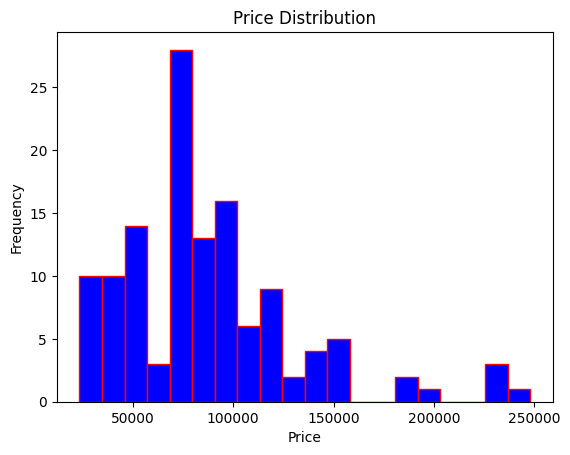

In [26]:
# Import the pyplot module from the matplotlib library
import matplotlib.pyplot as plt
# Set blue color
colors = ['blue']
# This line creates a histogram using the plt.hist() function
plt.hist(x=df["price_rupiah"], bins=20, color=colors, edgecolor='red' )
# These lines set the title of the plot to "Price Distribution" using plt.title(), the label for the x-axis to "Price" 
# using plt.xlabel(), and the label for the y-axis to "Frequency" using plt.ylabel().
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
# Display the plot
plt.show()

In [27]:
# This plot shows right skewed distribution because mean > median.

### For diameter column

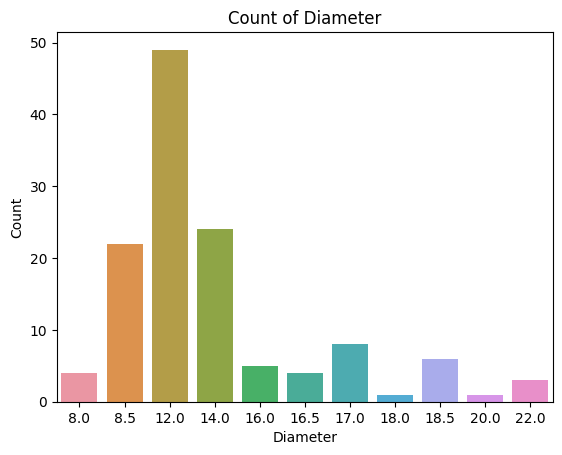

In [28]:
# Repeat the same for diameter distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='diameter', data=df)
plt.title('Count of Diameter')
plt.xlabel('Diameter')
plt.ylabel('Count')
plt.show()

In [29]:
# This plot shows right skewed distribution because mean > median.

### For topping column

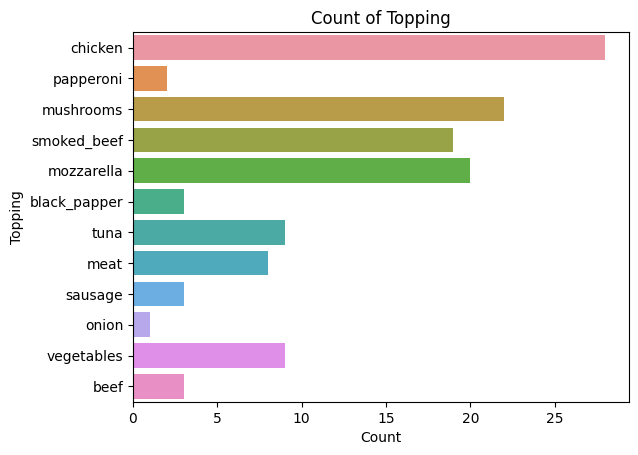

In [30]:
# This line creates a count plot using seaborn's countplot function. 
sns.countplot(y = df['topping'])
# These lines set the title of the plot to "Count of Topping" using plt.title(), the label for the x-axis to "Count" 
# using plt.xlabel(), and the label for the y-axis to "Topping" using plt.ylabel().
plt.title('Count of Topping')
plt.xlabel('Count')
plt.ylabel('Topping')
# Display the plot
plt.show()

In [31]:
# Customers ordered more chicken topping than others

### For size column

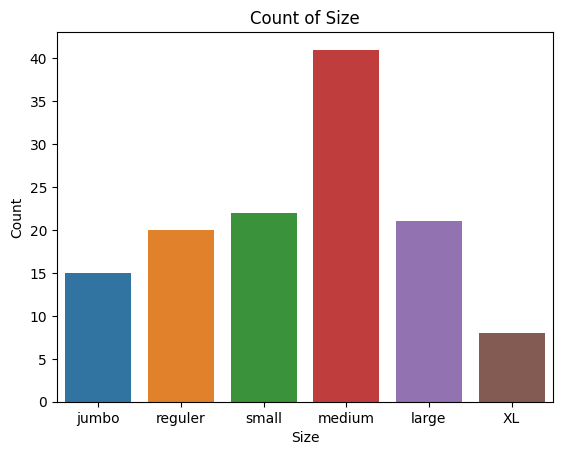

In [32]:
# Repeat the same for size column
sns.countplot(x='size', data=df)
plt.title('Count of Size')
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

In [33]:
# Customers ordered more median size than other sizes

### price_rupiah by topping

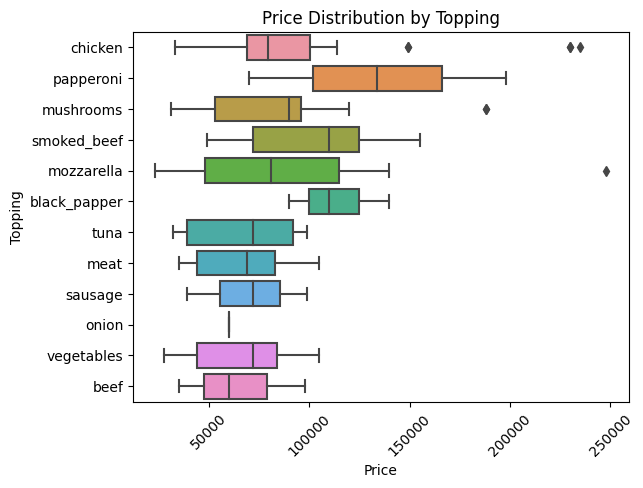

In [34]:
# This line creates a box plot using seaborn's boxplot function.
sns.boxplot(y='topping', x='price_rupiah', data=df)
# These lines set the title of the plot to "Price Distribution by Topping" using plt.title(), 
# the label for the x-axis to "Price" using plt.xlabel(), and the label for the y-axis to "Topping" using plt.ylabel().
plt.title('Price Distribution by Topping')
plt.xlabel('Price')
plt.ylabel('Topping')
# This line rotates the x-axis labels by 45 degrees
plt.xticks(rotation=45)  
# Display the plot
plt.show()

In [35]:
# Show few records
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18.0,mozzarella,double_signature,jumbo,yes,no,yes


## Label encoding

In [36]:
# Select columns from the DataFrame df that have data type 'object', 
# typically representing categorical variables, and stores their column names in the variable category_cols.
category_cols=df.select_dtypes(include=['object']).columns
# Show the result
category_cols

Index(['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese',
       'extra_mushrooms'],
      dtype='object')

In [37]:
# Import the LabelEncoder class from the preprocessing module of scikit-learn
from sklearn.preprocessing import LabelEncoder
# This line creates an instance of the LabelEncoder class, which will be used to perform the encoding.
en=LabelEncoder()
# This loop iterates over each column name in the list category_cols, 
# which contains the names of categorical columns in the DataFrame df. 
for i in category_cols:
    # This method fits the encoder to the unique values in the column (fitting) and 
    # then transforms the values in the column into numeric labels (transforming).
    df[i]=en.fit_transform(df[i])

In [38]:
# Show few records
df.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,235000,22.0,2,8,1,1,1,0
1,0,198000,20.0,7,8,1,1,1,0
2,0,120000,16.0,5,8,4,1,1,1
3,0,155000,14.0,9,8,4,1,0,1
4,0,248000,18.0,4,8,1,1,0,1


## Store Feature Matrix In X and Response(Target) In Vector y

In [39]:
# This line creates a new DataFrame X by dropping the column labeled 'price_rupiah ' from the original DataFrame df
X = df.drop('price_rupiah',axis=1)
# This line creates a Series y containing only the values from the column labeled 'price_rupiah' in the original DataFrame df.
# The resulting Series y contains the values of the 'price_rupiah' column, which is the target variable I want to predict.
y = df['price_rupiah']

## Splitting The Dataset Into The Training Set And Test Set

In [40]:
# Import the train_test_split function from the sklearn.model_selection module and 
# then splits the dataset into training and testing sets.
from sklearn.model_selection import train_test_split
# X: This is the DataFrame containing the features (independent variables).
# y: This is the Series containing the target variable (dependent variable).
# test_size=0.20: This parameter specifies the proportion of the dataset that should be included in the test split. 
# In this case, it's set to 0.20, meaning that 20% of the data will be used for testing, 
# and the remaining 80% will be used for training.
# random_state=42: This parameter sets the random seed for reproducibility
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

## Import The models

In [41]:
# Import few libraries
from sklearn.linear_model import LinearRegression
from  sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics

## Model Training & Evaluation

In [42]:
# This line creates an instance of the LinearRegression class from scikit-learn's linear_model module
lr = LinearRegression()
# This line trains the LinearRegression model (lr) on the training data (X_train and y_train) using the fit method
lr.fit(X_train,y_train)
# This line uses the trained LinearRegression model (lr) to predict the labels for the test data (X_test) using the predict method. 
y_pred_lr= lr.predict(X_test)
# Print the result
print('R2 Score of lr:', metrics.r2_score(y_test,y_pred_lr))
print('MAE Score of lr:', metrics.mean_absolute_error(y_test, y_pred_lr))

R2 Score of lr: 0.6963816467414312
MAE Score of lr: 19557.49521288839


In [43]:
# Repeat the same for SVM
svm  = SVR()
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
print('R2 Score of svm:', metrics.r2_score(y_test,y_pred_svm))
print('MAE Score of svm:', metrics.mean_absolute_error(y_test, y_pred_svm))

R2 Score of svm: -0.005149046424307802
MAE Score of svm: 34955.00129737948


In [44]:
# Repeat the same for RF
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print('R2 Score of rf:', metrics.r2_score(y_test,y_pred_rf))
print('MAE Score of rf:', metrics.mean_absolute_error(y_test, y_pred_rf))

R2 Score of rf: 0.8502351234221349
MAE Score of rf: 12226.73076923077


In [45]:
# Repeat the same for GBC
gr = GradientBoostingRegressor()
gr.fit(X_train,y_train)
y_pred_gr = gr.predict(X_test)
print('R2 Score of gr:', metrics.r2_score(y_test,y_pred_gr))
print('MAE Score of gr:', metrics.mean_absolute_error(y_test, y_pred_gr))

R2 Score of gr: 0.8942342517997997
MAE Score of gr: 11250.363262846704


In [46]:
# Repeat the same for XGB
xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
print('R2 Score of xgb:', metrics.r2_score(y_test,y_pred_xgb))
print('MAE Score of xgb:', metrics.mean_absolute_error(y_test, y_pred_xgb))

R2 Score of xgb: 0.7845224299815119
MAE Score of xgb: 10419.629807692309


In [47]:
# Create a DataFrame using a dictionary where the keys are column names ('Models' and 'R2_Score') 
# and the values are lists containing the corresponding data.
df_R2 = pd.DataFrame({'Models':['LR','SVC','RF','GBC','XGB'],
                           'R2_SCORE':[metrics.r2_score(y_test,y_pred_lr),
                                       metrics.r2_score(y_test,y_pred_svm),
                                       metrics.r2_score(y_test,y_pred_rf),
                                       metrics.r2_score(y_test,y_pred_gr),
                                       metrics.r2_score(y_test,y_pred_xgb)]})

In [48]:
# Show the result
df_R2


,Models,R2_SCORE
0,LR,0.696382
1,SVC,-0.005149
2,RF,0.850235
3,GBC,0.894234
4,XGB,0.784522


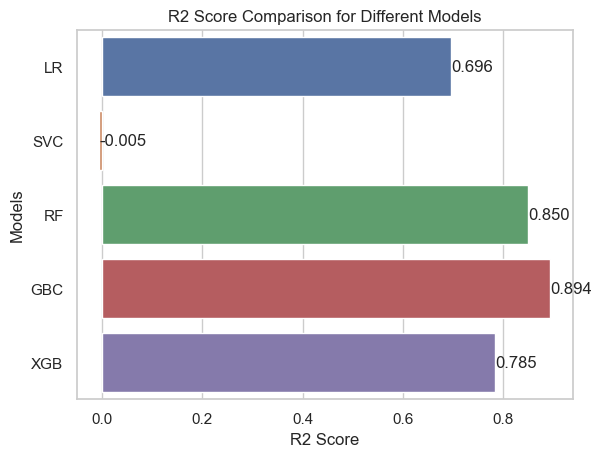

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains your data
sns.set(style="whitegrid")  # Set the style of the plot

# Create the bar plot
ax = sns.barplot(x='R2_SCORE', y='Models', data=df_R2)

# Adding labels and title
plt.xlabel('R2 Score')
plt.ylabel('Models')
plt.title('R2 Score Comparison for Different Models')

# Add text labels for each bar
for index, row in df_R2.iterrows():
    ax.text(row['R2_SCORE'], index, f'{row["R2_SCORE"]:.3f}', va='center')

# Display the plot
plt.show()

In [50]:
# Create a DataFrame using a dictionary where the keys are column names ('Models' and 'MAE_Score') 
# and the values are lists containing the corresponding data.
df_MAE = pd.DataFrame({'Models':['LR','SVC','RF','GBC','XGB'],
                           'MAE_SCORE':[metrics.mean_absolute_error(y_test,y_pred_lr),
                                       metrics.mean_absolute_error(y_test,y_pred_svm),
                                       metrics.mean_absolute_error(y_test,y_pred_rf),
                                       metrics.mean_absolute_error(y_test,y_pred_gr),
                                       metrics.mean_absolute_error(y_test,y_pred_xgb)]})

In [51]:
# Show the result
df_MAE

,Models,MAE_SCORE
0,LR,19557.495213
1,SVC,34955.001297
2,RF,12226.730769
3,GBC,11250.363263
4,XGB,10419.629808


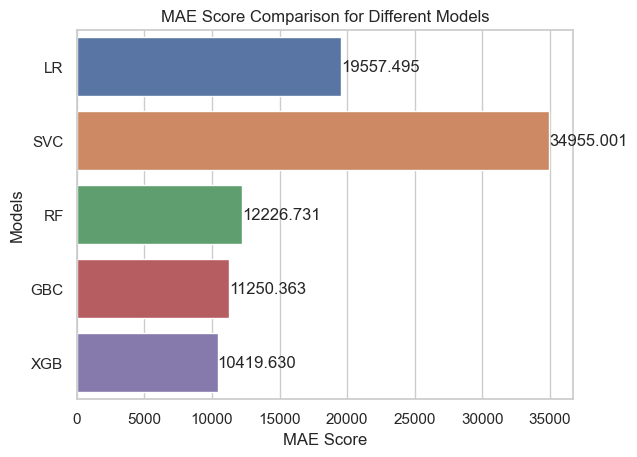

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df contains your data
sns.set(style="whitegrid")  # Set the style of the plot

# Create the bar plot
ax = sns.barplot(x='MAE_SCORE', y='Models', data=df_MAE)

# Adding labels and title
plt.xlabel('MAE Score')
plt.ylabel('Models')
plt.title('MAE Score Comparison for Different Models')

# Add text labels for each bar
for index, row in df_MAE.iterrows():
    ax.text(row['MAE_SCORE'], index, f'{row["MAE_SCORE"]:.3f}', va='center')

# Display the plot
plt.show()

In [53]:
# GB model is preferred

## Save The Model

In [54]:
# This line creates an instance of the GradientBoostingRegressor class from the ensemble module in scikit-learn.
gr = GradientBoostingRegressor()
# This line trains (fits) the GradientBoostingRegressor model on the entire dataset X and 
# corresponding target variable y using the fit method.
rf.fit(X,y)

RandomForestRegressor()

In [55]:
# Import the joblib library
import joblib
# This line saves the trained GradientBoostingRegressor model (gr) to a file named 'Pizza_Price_model'. 
joblib.dump(gr,'Pizza_Price_model')

['Pizza_Price_model']

In [56]:
# This line loads the previously saved model from the file 'Pizza_Price_model' and assigns it to the variable 'model'. 
# I can now use this model to make predictions on new data 
model = joblib.load('Pizza_Price_model')